In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


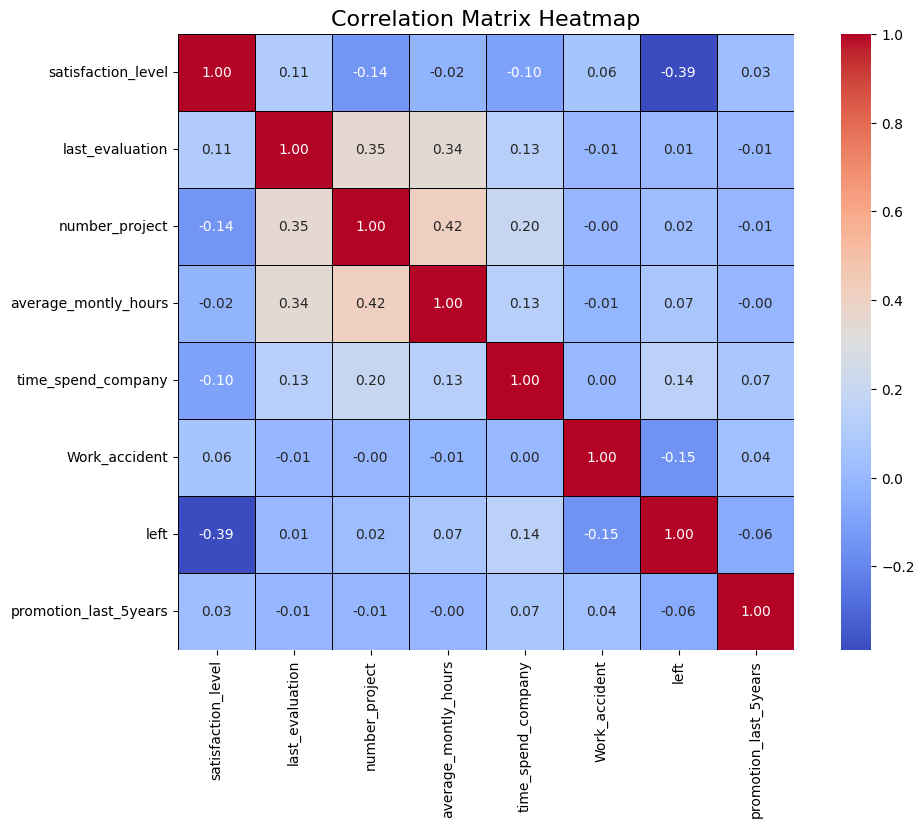

In [8]:
#Draw a heatmap of the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            linewidths=.5, linecolor='black')  # Draw the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

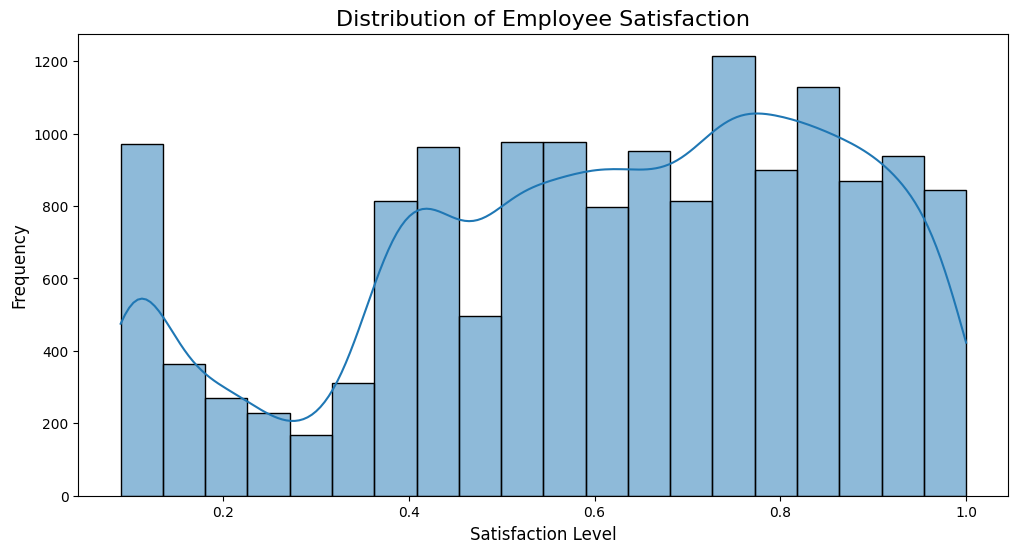

In [9]:
#Draw distribution plot for Employee Satisfaction
plt.figure(figsize=(12,6))
sns.histplot(df['satisfaction_level'],bins=20,kde=True)
plt.title('Distribution of Employee Satisfaction',fontsize=16)
plt.xlabel('Satisfaction Level',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

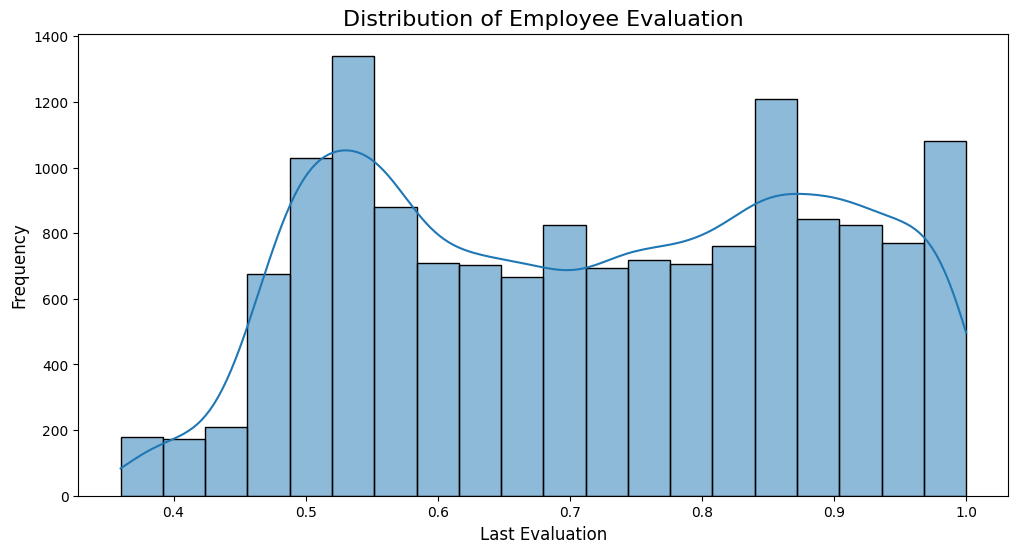

In [10]:
#Draw distribution plot for Employee Evaluation
plt.figure(figsize=(12, 6))
sns.histplot(df['last_evaluation'], bins=20, kde=True)
plt.title('Distribution of Employee Evaluation', fontsize=16)
plt.xlabel('Last Evaluation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

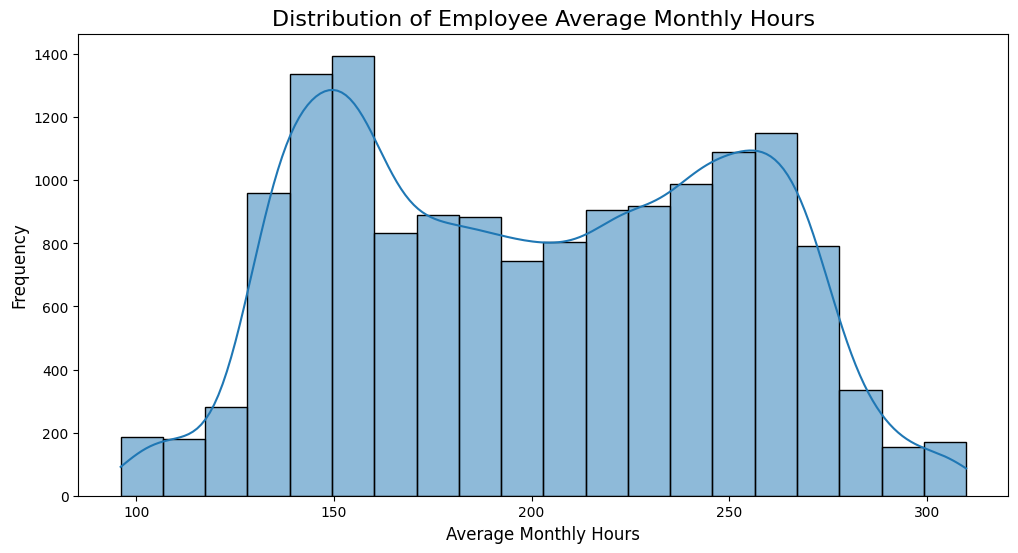

In [11]:
#Draw distribution plot for Employee Average Monthly Hours
plt.figure(figsize=(12, 6))
sns.histplot(df['average_montly_hours'], bins=20, kde=True)
plt.title('Distribution of Employee Average Monthly Hours', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

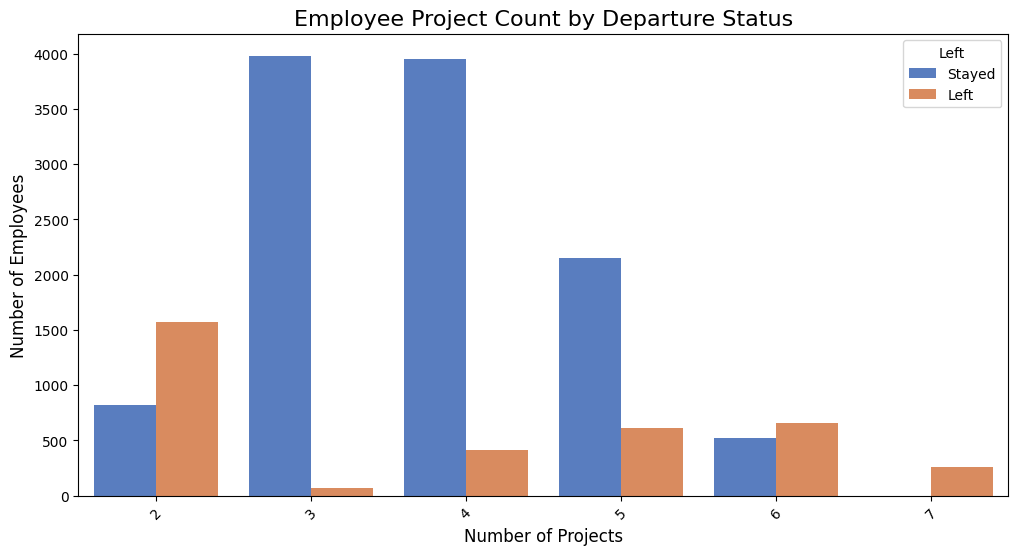

In [12]:
# Draw the bar plot for employee project count
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='number_project', hue='left', palette='muted')
# Customize the plot
plt.title('Employee Project Count by Departure Status', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

In [13]:
# Step 1: Filter the data for employees who left
left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [14]:
# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(left_employees)

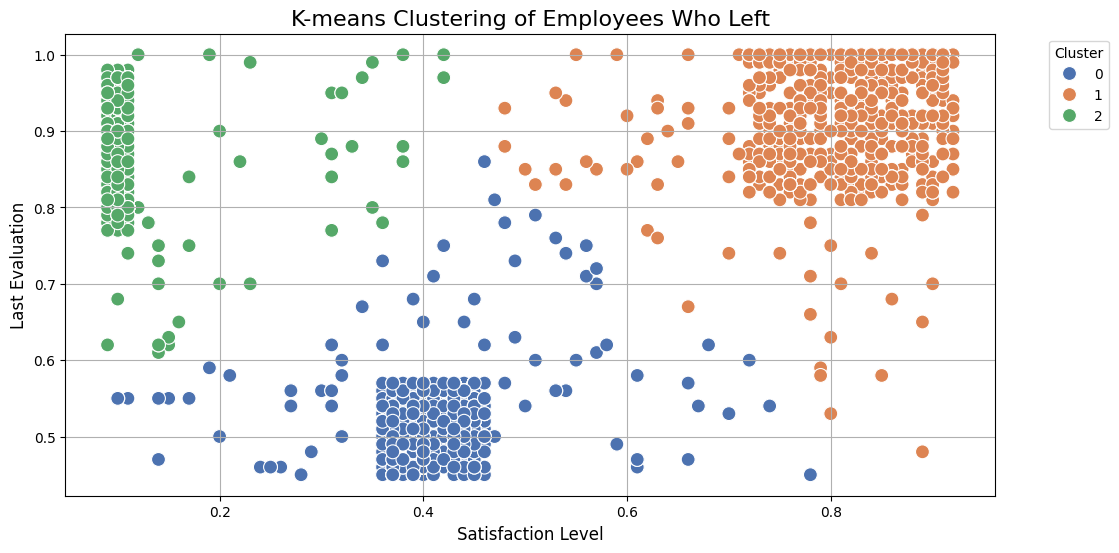

In [15]:
#Step 3: Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=left_employees, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='deep', s=100)
plt.title('K-means Clustering of Employees Who Left', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Last Evaluation', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [16]:
#Pre-process the data


In [17]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(exclude=['object']).columns.tolist()


In [18]:
# Convert categorical variables to numerical
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)  # Avoiding dummy variable trap

In [19]:
# Combine categorical and numerical variables
df_final = pd.concat([df_encoded, df[numeric_cols]], axis=1)

In [20]:
# Display the first few rows of the processed dataframe
df_final.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,False,False,False,False,False,False,True,False,False,True,False,0.38,0.53,2,157,3,0,1,0
1,False,False,False,False,False,False,True,False,False,False,True,0.80,0.86,5,262,6,0,1,0
2,False,False,False,False,False,False,True,False,False,False,True,0.11,0.88,7,272,4,0,1,0
3,False,False,False,False,False,False,True,False,False,True,False,0.72,0.87,5,223,5,0,1,0
4,False,False,False,False,False,False,True,False,False,True,False,0.37,0.52,2,159,3,0,1,0


In [21]:
# Step 4.2: Stratified split of the dataset
X = df_final.drop('left', axis=1)  # Features
y = df_final['left']  # Target variable

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [23]:
# Check the class distribution in training and testing sets
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())

Training set class distribution:
 left
0    9142
1    2857
Name: count, dtype: int64
Testing set class distribution:
 left
0    2286
1     714
Name: count, dtype: int64


In [24]:
# Step 4.3: Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Resampled training set class distribution:\n", y_train_resampled.value_counts())

Resampled training set class distribution:
 left
0    9142
1    9142
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Assuming df_final is your processed DataFrame and the target variable 'left' is already separated
X = df_final.drop('left', axis=1)  # Features
y = df_final['left']  # Target variable

In [27]:
# Step 5.1: Train a Logistic Regression model and apply 5-fold CV
log_model = LogisticRegression(max_iter=1000)
y_pred_log = cross_val_predict(log_model, X, y, cv=5)

In [28]:
# Classification report for Logistic Regression
log_report = classification_report(y, y_pred_log, output_dict=True)

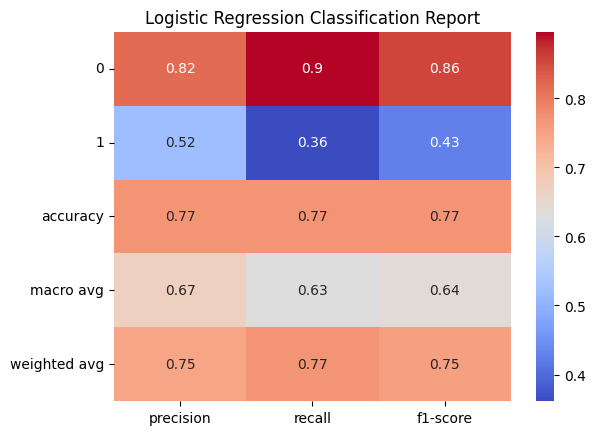

In [29]:
# Plotting the classification report
sns.heatmap(pd.DataFrame(log_report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Logistic Regression Classification Report')
plt.show()

In [30]:
# Step 5.2: Train a Random Forest Classifier model and apply 5-fold CV
rf_model = RandomForestClassifier(random_state=123)
y_pred_rf = cross_val_predict(rf_model, X, y, cv=5)

In [31]:
# Classification report for Random Forest
rf_report = classification_report(y, y_pred_rf, output_dict=True)

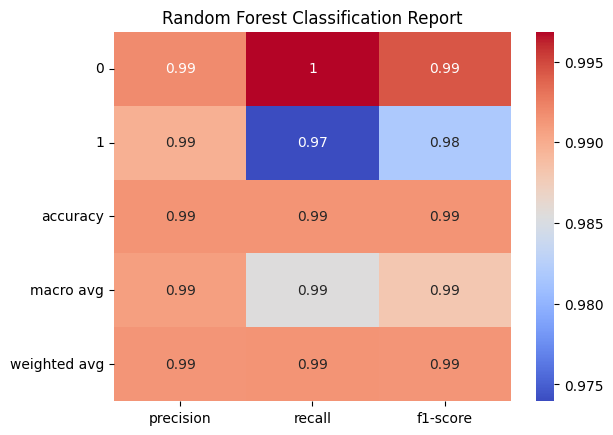

In [32]:
# Plotting the classification report
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Random Forest Classification Report')
plt.show()

In [33]:
# Step 5.3: Train a Gradient Boosting Classifier model and apply 5-fold CV
gb_model = GradientBoostingClassifier(random_state=123)
y_pred_gb = cross_val_predict(gb_model, X, y, cv=5)

In [34]:
# Classification report for Gradient Boosting
gb_report = classification_report(y, y_pred_gb, output_dict=True)

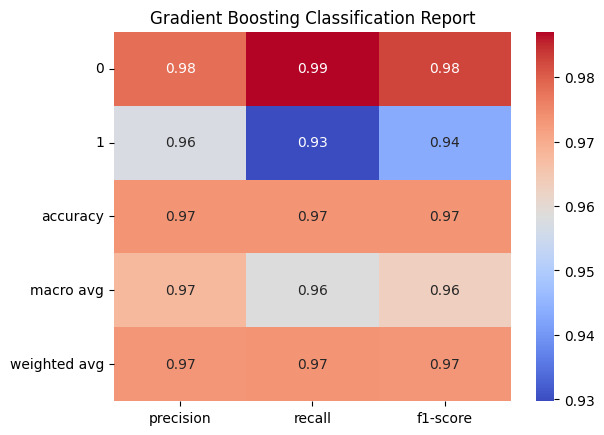

In [35]:
# Plotting the classification report
sns.heatmap(pd.DataFrame(gb_report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Gradient Boosting Classification Report')
plt.show()

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# Step 6.1: Calculate ROC/AUC and plot ROC curve for each model
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    return roc_auc

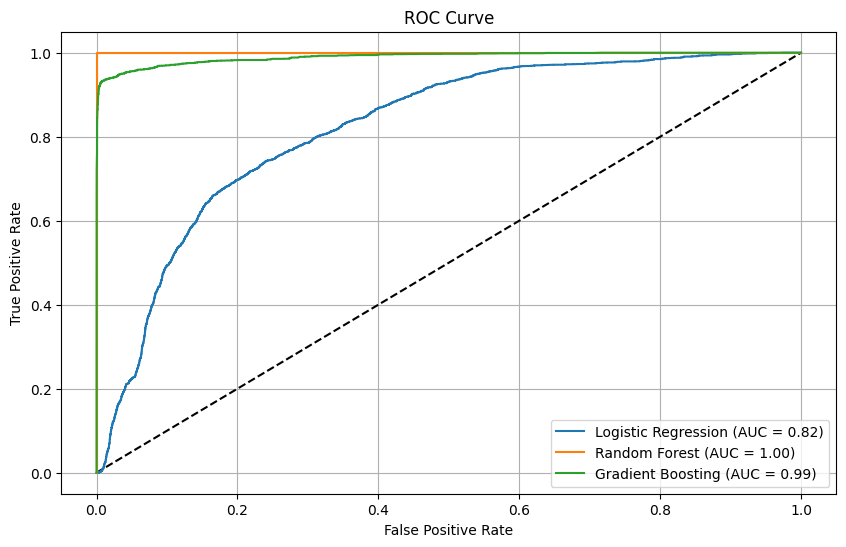

In [37]:
# Initialize a plot
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

# Logistic Regression
log_model.fit(X, y)  # Fit the model
y_scores_log = log_model.predict_proba(X)[:, 1]  # Get the probabilities
log_auc = plot_roc_curve(y, y_scores_log, 'Logistic Regression')

# Random Forest Classifier
rf_model.fit(X, y)  # Fit the model
y_scores_rf = rf_model.predict_proba(X)[:, 1]  # Get the probabilities
rf_auc = plot_roc_curve(y, y_scores_rf, 'Random Forest')

# Gradient Boosting Classifier
gb_model.fit(X, y)  # Fit the model
y_scores_gb = gb_model.predict_proba(X)[:, 1]  # Get the probabilities
gb_auc = plot_roc_curve(y, y_scores_gb, 'Gradient Boosting')
# Finalize the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.show()

In [38]:
# Print the AUC for each model
print(f'Logistic Regression AUC: {log_auc:.2f}')
print(f'Random Forest AUC: {rf_auc:.2f}')
print(f'Gradient Boosting AUC: {gb_auc:.2f}')


Logistic Regression AUC: 0.82
Random Forest AUC: 1.00
Gradient Boosting AUC: 0.99


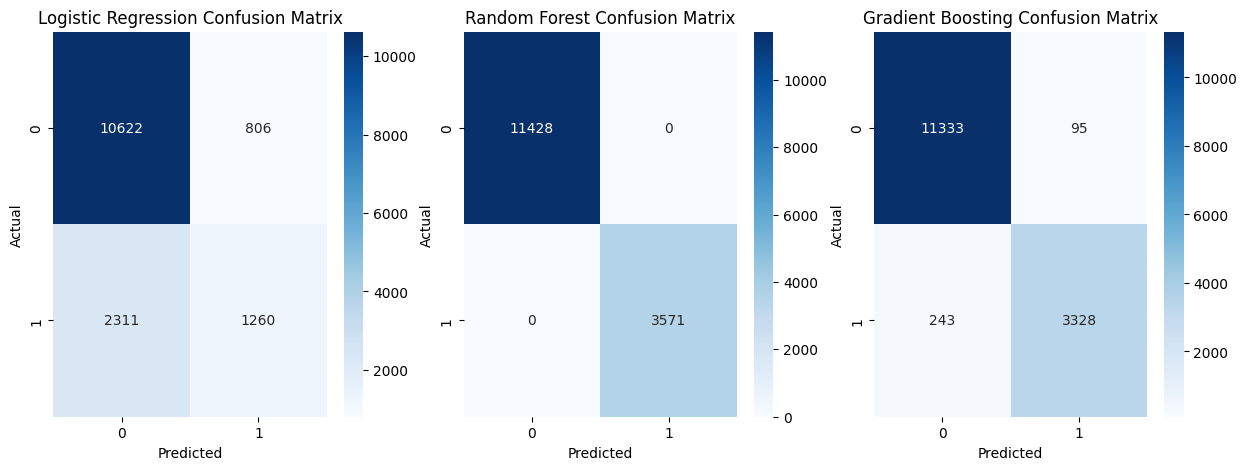

In [39]:
# Step 6.2: Confusion Matrix for each model
# Get predicted classes for each model
y_pred_log = (y_scores_log >= 0.5).astype(int)
y_pred_rf = (y_scores_rf >= 0.5).astype(int)
y_pred_gb = (y_scores_gb >= 0.5).astype(int)

# Confusion Matrices
cm_log = confusion_matrix(y, y_pred_log)
cm_rf = confusion_matrix(y, y_pred_rf)
cm_gb = confusion_matrix(y, y_pred_gb)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Encoding categorical columns ('sales' and 'salary')
label_encoder = LabelEncoder()

# Apply Label Encoding to 'sales' (department) and 'salary' columns
df['sales'] = label_encoder.fit_transform(df['sales'])
df['salary'] = label_encoder.fit_transform(df['salary'])

# Preprocessing: Split the dataset into features (X) and target (y)
X = df.drop(columns=['left'])  # 'left' is the target variable
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model (RandomForest in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the probability of employee turnover on the test data
y_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class (turnover)

# Add predicted probability to the test data for analysis
X_test['Turnover_Probability'] = y_proba

# Function to categorize employees into risk zones
def categorize_risk(probability):
    if probability < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= probability < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply the categorization function to the test data
X_test['Risk_Zone'] = X_test['Turnover_Probability'].apply(categorize_risk)

# Print a sample of the test data with probability and risk zone
print(X_test[['Turnover_Probability', 'Risk_Zone']].head())

# Generate classification report
y_pred = model.predict(X_test.drop(columns=['Turnover_Probability', 'Risk_Zone']))
print(classification_report(y_test, y_pred))

# Optionally: Save the results to a CSV file
X_test.to_csv('employee_risk_zones.csv', index=False)


      Turnover_Probability             Risk_Zone
6723                   0.0     Safe Zone (Green)
6473                   0.0     Safe Zone (Green)
4679                   0.0     Safe Zone (Green)
862                    1.0  High-Risk Zone (Red)
7286                   0.0     Safe Zone (Green)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

